In [575]:
print("ML Problem: Titanic")

ML Problem: Titanic


In [576]:
import pandas as pd
import numpy as np
train_df = pd.read_csv("titanic/train.csv", na_values=['no info', '.'])
test_df = pd.read_csv("titanic/test.csv", na_values=['no info', '.'])

In [617]:
# print(train_df.head(5))
print(train_df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Sex_code',
       'Cabin_code', 'Embarked_code'],
      dtype='object')


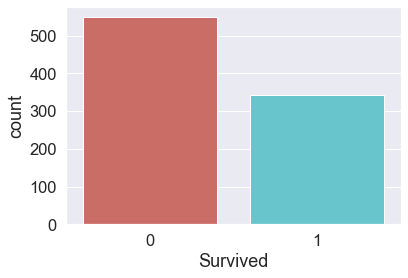

Number of people in training survived = 342 / 891 


In [578]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.5)
countplt=sns.countplot(x='Survived', data=train_df, palette ='hls')
plt.show()

count_no_survived = len(train_df[train_df['Survived']==1])
print("Number of people in training survived = %d / %d " %(count_no_survived, len(train_df)))

In [579]:
# Visualising training data
out_label = train_df.groupby('Survived').mean()
print(out_label)

          PassengerId    Pclass        Age     SibSp     Parch       Fare
Survived                                                                 
0          447.016393  2.531876  30.626179  0.553734  0.329690  22.117887
1          444.368421  1.950292  28.343690  0.473684  0.464912  48.395408


In [580]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
cat_vars = ["Sex", "Cabin","Embarked"]
other_vars = ["Age", "Pclass", "SibSp", "Parch", "Fare"]
add_vars = ["CabinB", "NumSeats", "FamSize"]

def data_proc(data):
    for var in cat_vars:
        data[var] = data[var].fillna('Missing')
        data[var+"_code"] = lb_make.fit_transform(data[var])
        
    for other_var in other_vars:
        data[other_var].fillna((data[other_var].mean()),inplace=True)

#     data['CabinB'] = [word[0:1] for word in data['Cabin']]
#     data['CabinB'] = lb_make.fit_transform(data['CabinB'])
#     data['NumSeats'] = [len(word.split(' ')) for word in data['Cabin']]
#     data['FamSize'] = data['Parch'] + data['SibSp']
    
    out_vars = data.columns.values.tolist()
    to_keep = [i for i in out_vars if i not in cat_vars]
    
    return data[to_keep]

In [581]:
train_data = data_proc(train_df)
final_features = train_data.columns.values.tolist()
Y = ['Survived']
X = [i for i in final_features if i not in ["Survived", "PassengerId", "Name", "Ticket"]]

In [583]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

# train data
X_train = train_data[X]
print(X_train.head())
y_train = train_data[Y].values.ravel()
scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_train = preprocessing.normalize(X_train)

   Pclass   Age  SibSp  Parch     Fare  Sex_code  Cabin_code  Embarked_code
0       3  22.0      1      0   7.2500         1         146              3
1       1  38.0      1      0  71.2833         0          81              0
2       3  26.0      0      0   7.9250         0         146              3
3       1  35.0      1      0  53.1000         0          55              3
4       3  35.0      0      0   8.0500         1         146              3


In [584]:
# print(train_data[X])

In [613]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn import svm

# Using A GBC
grid_values = { 'learning_rate' : [0.005], 
                'n_estimators'  : [1000],
                'max_features'  : ['sqrt'] }

# grid_values = { 'C': [1,2,5,10], 'kernel': ['rbf']}
clf = GridSearchCV(GradientBoostingClassifier(random_state = 0), param_grid = grid_values, scoring = 'accuracy', cv = 3)
clf.fit(X_train, y_train)
print(clf.best_params_)

{'learning_rate': 0.005, 'max_features': 'sqrt', 'n_estimators': 1000}


In [614]:
test_data = data_proc(test_df)
X_test = test_data[X]
# X_test = scaler.fit_transform(X_test)
# X_test = preprocessing.normalize(X_test)
y_test_pred = clf.predict(X_test)

In [615]:
result_df = pd.DataFrame({'PassengerId': test_df["PassengerId"], 'Survived': y_test_pred})
result_df.to_csv(r'titanic/test_pred.csv', index = False)

In [616]:
clf.score(X_train, y_train)

0.8653198653198653